In [19]:
import re
import numpy as np
import pandas as pd

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_parquet("data/cleaned_artwork_data.parquet")

In [20]:
data.head()

,ConstituentID,DisplayName,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN,Title,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Height (cm),Width (cm),completedDate,DateAcquired_year,DateAcquired_month,DateAcquired_day,DateAcquired_weekday
0,1,Robert Arneson,American,Male,1930,1992,Unknown,0.0,Study for Head Bath,Conté crayon and pencil on paper,"41 5/8 x 29 7/8"" (105.8 x 75.8 cm)",Gift of the Friends of Contemporary Drawing,67.1981,Drawing,Drawings & Prints,1981-04-28,Y,33599.0,http://www.moma.org/collection/works/33599,http://www.moma.org/media/W1siZiIsIjMwODE4MyJd...,105.7,75.9,1977.0,1981,4,28,1
1,1,Robert Arneson,American,Male,1930,1992,Unknown,0.0,General Nuke,Lithograph,"composition (irreg.): 31 11/16 x 23 5/16"" (80....",Gift of Landfall Press,192.1997,Print,Drawings & Prints,1997-05-28,Y,64139.0,http://www.moma.org/collection/works/64139,Unknown,80.5,59.2,1986.0,1997,5,28,2
2,2,Doroteo Arnaiz,Spanish,Male,1936,0,Unknown,0.0,BAS-RELIEF,"Etching, printed in color","Plate 21 1/2 x 15 5/8"" (54.7 x 39.7 cm) Sheet ...",Gift of the artist,87.1965,Print,Drawings & Prints,1965-03-09,N,61629.0,Unknown,Unknown,54.7,39.7,2022.0,1965,3,9,1
3,3,Bill Arnold,American,Male,1941,0,Unknown,0.0,Honey under Sink,Microfilm reader-printer machine print,"15 × 22 7/8"" (38.1 × 58.2 cm)",Purchase,87.1972,Photograph,Photography,1972-03-07,Y,45972.0,http://www.moma.org/collection/works/45972,http://www.moma.org/media/W1siZiIsIjI1ODcxNiJd...,38.1,58.2,1971.0,1972,3,7,1
4,3,Bill Arnold,American,Male,1941,0,Unknown,0.0,Honey under Chair,Microfilm reader-printer machine print,"15 × 22 3/4"" (38.1 × 57.8 cm)",Purchase,88.1972,Photograph,Photography,1972-03-07,Y,45997.0,http://www.moma.org/collection/works/45997,http://www.moma.org/media/W1siZiIsIjI1ODcxNyJd...,38.1,57.8,1971.0,1972,3,7,1


### Analysing the title column

In [4]:
data.Title

0                                       Study for Head Bath
1                                              General Nuke
2                                                BAS-RELIEF
3                                          Honey under Sink
4                                         Honey under Chair
                                ...                        
129887    The Black Panther Newspaper, vol. 3, no. 17 (E...
129888    The Black Panther Newspaper, vol. 3, no. 20 (H...
129889    The Black Panther Newspaper, vol. 3, no. 22 (O...
129890    Schematic Composition [Composition schématique...
129891                                             The Room
Name: Title, Length: 129892, dtype: object

In [30]:
combined_titles = " ".join(title.lower() for title in data.Title)
print(f"length of combined title is {len(combined_titles)}")

length of combined title is 5050892


In [77]:
stopwords_titles = set(STOPWORDS)
stopwords_titles.update(["Untitled", "text"])
wordcloud = WordCloud(stopwords=stopwords_titles, max_words=1000, width=600, height=400, collocations=False).generate(combined_titles)

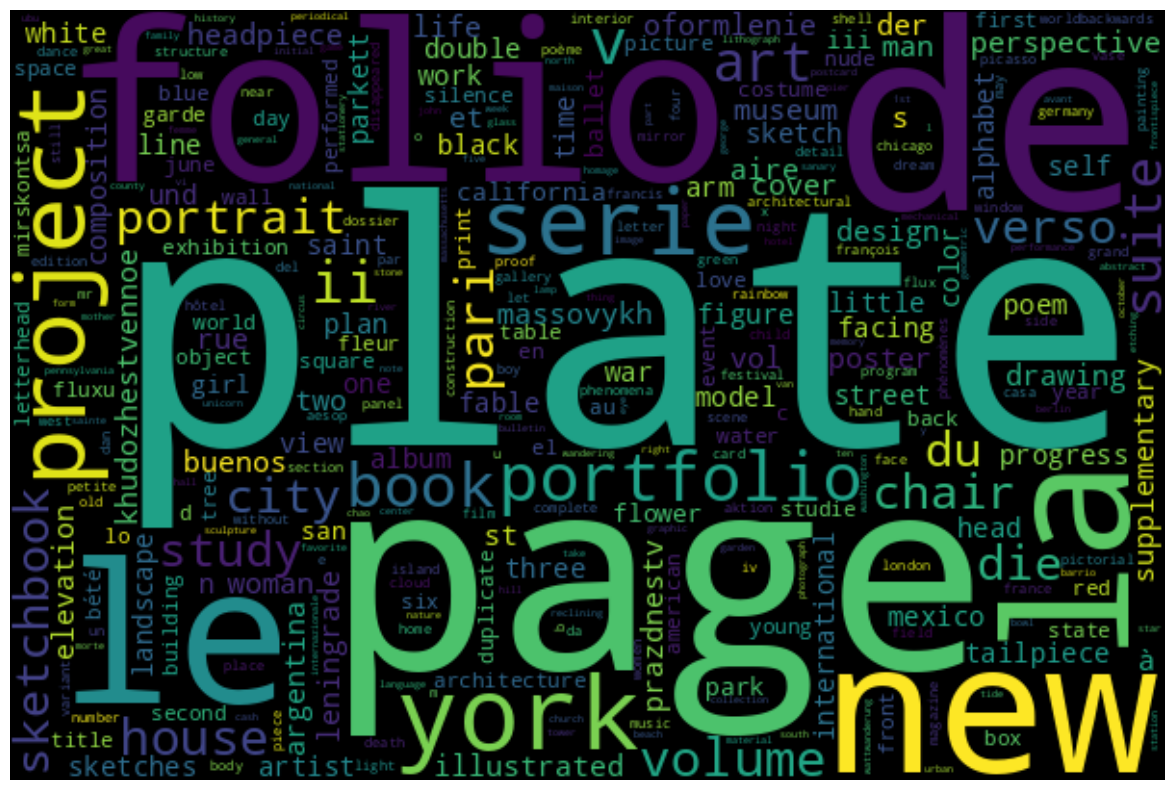

<Figure size 640x480 with 0 Axes>

In [79]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

plt.savefig("images/title_wordcloud.png", format="png")

### Text analysis on CreditLine

In [35]:
data.CreditLine

0               Gift of the Friends of Contemporary Drawing
1                                    Gift of Landfall Press
2                                        Gift of the artist
3                                                  Purchase
4                                                  Purchase
                                ...                        
129887    Collection of Patrick and Nesta McQuaid and Ak...
129888    Collection of Patrick and Nesta McQuaid and Ak...
129889    Collection of Patrick and Nesta McQuaid and Ak...
129890                                Gift of Silvia Pizitz
129891                          Gift of Kleiner, Bell & Co.
Name: CreditLine, Length: 129892, dtype: object

In [37]:
combined_description = " ".join(txt for txt in data.CreditLine)
print(f"length of combined creditLine is {len(combined_description)}")

length of combined creditLine is 5304402


In [75]:
stopwords_credit_line = set(STOPWORDS)
stopwords_credit_line.update(["artist", "artwork"])
wordcloud_credit_line = WordCloud(stopwords=stopwords_credit_line, max_words=1000, width=600, height=400, collocations=False).generate(combined_description)

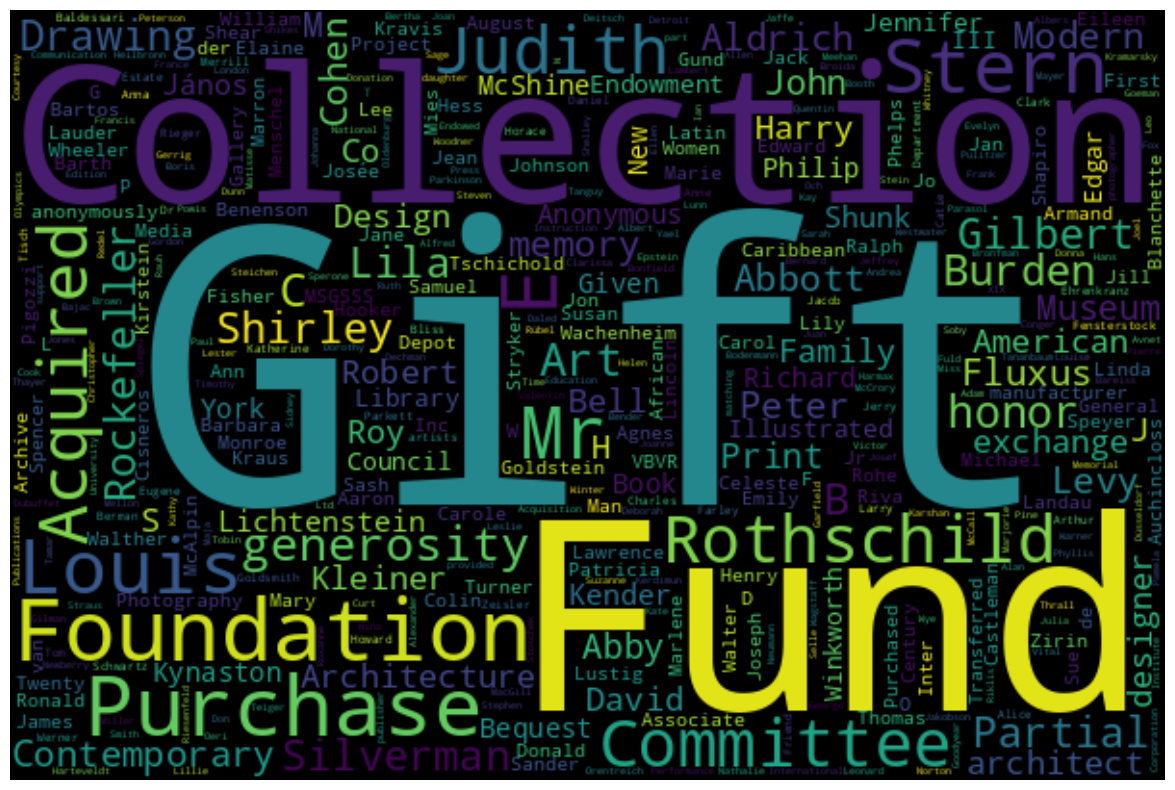

<Figure size 640x480 with 0 Axes>

In [80]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_credit_line, interpolation="bilinear")
plt.axis("off")
plt.show()

plt.savefig("images/creditline_wordcloud.png", format="png")

### Text Analysis on the Medium

In [57]:
data.Medium

0               Conté crayon and pencil on paper
1                                     Lithograph
2                      Etching, printed in color
3         Microfilm reader-printer machine print
4         Microfilm reader-printer machine print
                           ...                  
129887                Two color ink on newsprint
129888                Two color ink on newsprint
129889                Two color ink on newsprint
129890         Oil and wood on composition board
129891                                Lithograph
Name: Medium, Length: 129892, dtype: object

In [58]:
combined_medium_txt = " ".join(txt for txt in data.Medium)
print(f"length of combined medium is {len(combined_medium_txt)}")

length of combined medium is 4932643


In [73]:
stopwords_medium = set(STOPWORDS)
stopwords_medium.update(["artist", "artwork"])
wordcloud_medium = WordCloud(stopwords=stopwords_medium, max_words=1000, width=600, height=400, collocations=False).generate(combined_medium_txt)

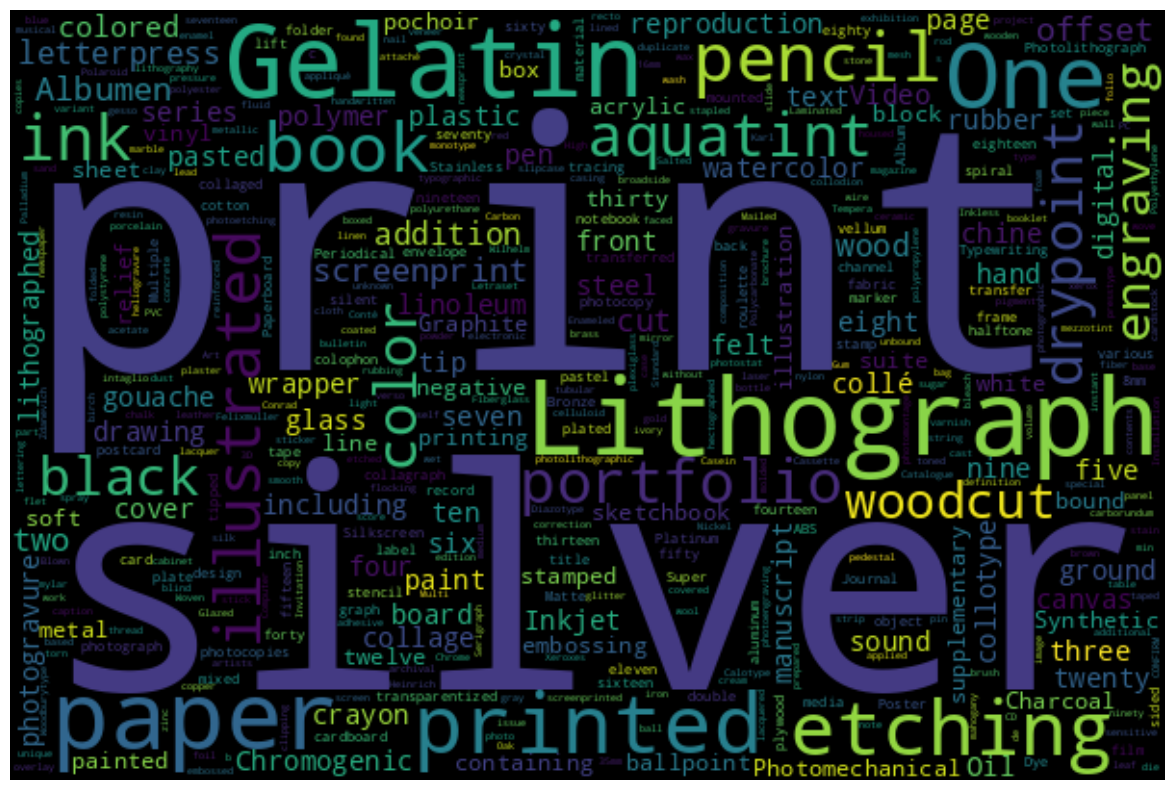

<Figure size 640x480 with 0 Axes>

In [81]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_medium, interpolation="bilinear")
plt.axis("off")
plt.show()

plt.savefig("images/medium_wordcloud.png", format="png")